In [25]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler


import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Import the processed data.
df = pd.read_csv('processed_data.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,Sex_Male,LastCheckupTime_Within past 2 years (1 year but less than 2 years ago),LastCheckupTime_Within past 5 years (2 years but less than 5 years ago),LastCheckupTime_Within past year (anytime less than 12 months ago),PhysicalActivities_Yes,...,AgeCategory_Age 40 to 44,AgeCategory_Age 45 to 49,AgeCategory_Age 50 to 54,AgeCategory_Age 55 to 59,AgeCategory_Age 60 to 64,AgeCategory_Age 65 to 69,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,AlcoholDrinkers_Yes
0,-0.48774,0.113974,-0.025174,-0.061718,1.404549,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,-0.48774,-0.508455,0.674879,1.619866,0.760563,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,-0.48774,-0.508455,-0.725227,-0.528825,0.116577,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,-0.48774,-0.508455,0.674879,0.872496,-0.097769,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,-0.48774,-0.508455,-0.025174,0.685653,1.189729,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [27]:
# Check value counts of HadHeartAttack_Yes.
df.value_counts('HadHeartAttack_Yes')

HadHeartAttack_Yes
0    23673
1     1327
dtype: int64

In [28]:
# Assign HadHeartAttack_Yes as target variable.
y = df.HadHeartAttack_Yes.values
X = df.drop(columns="HadHeartAttack_Yes").values

# Split training/test datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)


In [29]:
# Instantiate the random oversampler model
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_res, y_res = ros.fit_resample(X_train, y_train)

# NN Model #1
- 25,000 data points
- No hidden layers
- 50 epochs
- Non-resampled data

In [30]:
# Create neural network structure.
nn = tf.keras.models.Sequential()

num_inputs = len(X_train[0])

# Input layer.
nn.add(tf.keras.layers.Dense(units=8, activation='relu', input_dim=num_inputs))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
586/586 [==============================] - 1s 1ms/step - loss: 0.2635 - accuracy: 0.9191
Epoch 2/50
586/586 [==============================] - 1s 1ms/step - loss: 0.1668 - accuracy: 0.9471
Epoch 3/50
586/586 [==============================] - 1s 1ms/step - loss: 0.1532 - accuracy: 0.9486
Epoch 4/50
586/586 [==============================] - 1s 1ms/step - loss: 0.1478 - accuracy: 0.9483
Epoch 5/50
586/586 [==============================] - 1s 1ms/step - loss: 0.1458 - accuracy: 0.9497
Epoch 6/50
586/586 [==============================] - 1s 1ms/step - loss: 0.1447 - accuracy: 0.9502
Epoch 7/50
586/586 [==============================] - 1s 1ms/step - loss: 0.1441 - accuracy: 0.9506
Epoch 8/50
586/586 [==============================] - 1s 982us/step - loss: 0.1436 - accuracy: 0.9506
Epoch 9/50
586/586 [==============================] - 1s 1ms/step - loss: 0.1431 - accuracy: 0.9510
Epoch 10/50
586/586 [==============================] - 1s 1ms/step - loss: 0.1427 - accuracy: 0.95

In [31]:
# Make predictions.
predictions = nn.predict(X_test)
predictions_list = predictions.flatten().tolist()
# plt.hist(predictions_list)

# Create a dataframe with actual heart disease labels along with the model's predictions.
evaluation_df = pd.DataFrame({'Has Heart Disease': y_test, 'Model Prediction': predictions_list})
positive_df = evaluation_df[evaluation_df['Has Heart Disease'] == 1]
positive_df

196/196 [==============================] - 0s 827us/step


,Has Heart Disease,Model Prediction
18,1,0.105730
22,1,0.656145
43,1,0.490176
88,1,0.426902
94,1,0.044654
...,...,...
6177,1,0.154035
6196,1,0.475964
6221,1,0.237684
6227,1,0.694719


<Axes: >

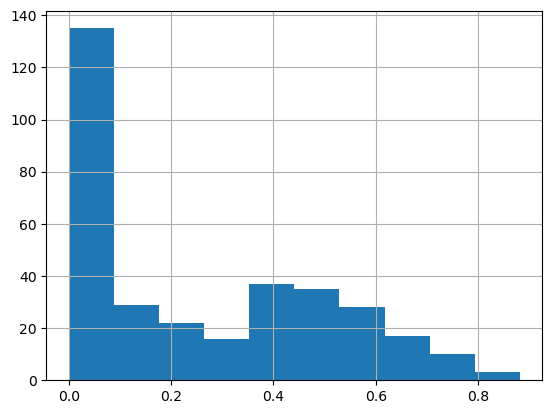

In [32]:
# A histogram of the model's predictions for people with heart disease.
positive_df['Model Prediction'].hist()

<Axes: >

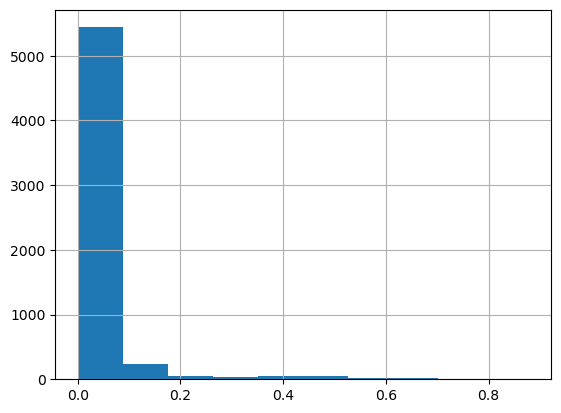

In [33]:
# Histogram of the model's predictions for people without heart disease.
negative_df = evaluation_df[evaluation_df['Has Heart Disease'] == 0]
negative_df['Model Prediction'].hist()

# NN Model #2
- 25,000 data points
- No hidden layers
- 50 epochs
- Using resampled data

In [34]:
# Create neural network structure.
nn = tf.keras.models.Sequential()

num_inputs = len(X_train[0])

# Input layer.
nn.add(tf.keras.layers.Dense(units=8, activation='relu', input_dim=num_inputs))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_res, y_res, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
1110/1110 [==============================] - 2s 1ms/step - loss: 0.5258 - accuracy: 0.7284
Epoch 2/50
1110/1110 [==============================] - 1s 1ms/step - loss: 0.4291 - accuracy: 0.8004
Epoch 3/50
1110/1110 [==============================] - 1s 1ms/step - loss: 0.4226 - accuracy: 0.8048
Epoch 4/50
1110/1110 [==============================] - 1s 1ms/step - loss: 0.4186 - accuracy: 0.8063
Epoch 5/50
1110/1110 [==============================] - 1s 1ms/step - loss: 0.4155 - accuracy: 0.8074
Epoch 6/50
1110/1110 [==============================] - 1s 994us/step - loss: 0.4131 - accuracy: 0.8072
Epoch 7/50
1110/1110 [==============================] - 1s 1ms/step - loss: 0.4106 - accuracy: 0.8093
Epoch 8/50
1110/1110 [==============================] - 1s 1ms/step - loss: 0.4087 - accuracy: 0.8121
Epoch 9/50
1110/1110 [==============================] - 1s 1ms/step - loss: 0.4069 - accuracy: 0.8125
Epoch 10/50
1110/1110 [==============================] - 1s 1ms/step - loss: 0.4

196/196 [==============================] - 0s 844us/step


<Axes: >

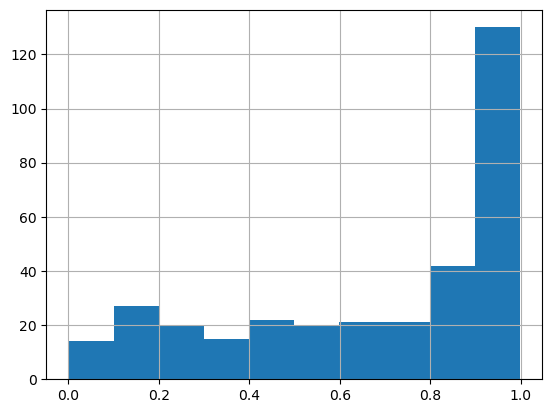

In [35]:
# Make predictions.
predictions = nn.predict(X_test)
predictions_list = predictions.flatten().tolist()
# plt.hist(predictions_list)

# Create a dataframe with actual heart disease labels along with the model's predictions.
evaluation_df = pd.DataFrame({'Has Heart Disease': y_test, 'Model Prediction': predictions_list})
positive_df = evaluation_df[evaluation_df['Has Heart Disease'] == 1]
positive_df['Model Prediction'].hist()

<Axes: >

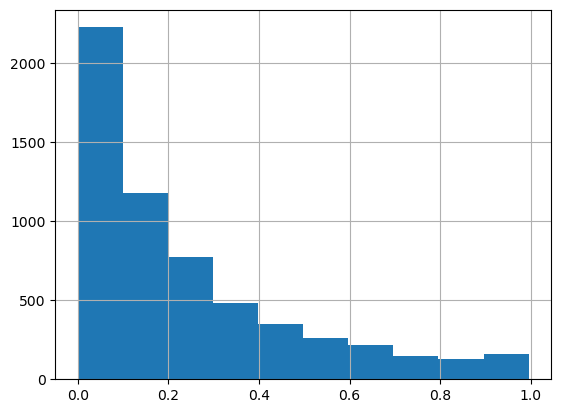

In [36]:
# Histogram of the model's predictions for people without heart disease.
negative_df = evaluation_df[evaluation_df['Has Heart Disease'] == 0]
negative_df['Model Prediction'].hist()

# NN Model #3
- 25,000 Data points
- 2 hidden layers
- Non-resampled data

In [37]:
# Create neural network structure.
nn = tf.keras.models.Sequential()

num_inputs = len(X_train[0])

# Input layer.
nn.add(tf.keras.layers.Dense(units=16, activation='relu', input_dim=num_inputs))

# First hidden layer
nn.add(tf.keras.layers.Dense(units=32, activation="relu"))

# Second hidden layer.
nn.add(tf.keras.layers.Dense(units=32, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
586/586 [==============================] - 1s 1ms/step - loss: 0.2019 - accuracy: 0.9455
Epoch 2/50
586/586 [==============================] - 1s 1ms/step - loss: 0.1501 - accuracy: 0.9487
Epoch 3/50
586/586 [==============================] - 1s 1ms/step - loss: 0.1460 - accuracy: 0.9501
Epoch 4/50
586/586 [==============================] - 1s 1ms/step - loss: 0.1438 - accuracy: 0.9506
Epoch 5/50
586/586 [==============================] - 1s 1ms/step - loss: 0.1431 - accuracy: 0.9503
Epoch 6/50
586/586 [==============================] - 1s 1ms/step - loss: 0.1416 - accuracy: 0.9506
Epoch 7/50
586/586 [==============================] - 1s 1ms/step - loss: 0.1404 - accuracy: 0.9515
Epoch 8/50
586/586 [==============================] - 1s 1ms/step - loss: 0.1394 - accuracy: 0.9518
Epoch 9/50
586/586 [==============================] - 1s 1ms/step - loss: 0.1391 - accuracy: 0.9521
Epoch 10/50
586/586 [==============================] - 1s 1ms/step - loss: 0.1378 - accuracy: 0.9533

In [38]:
# Make predictions.
predictions = nn.predict(X_test)
predictions_list = predictions.flatten().tolist()
# plt.hist(predictions_list)

196/196 [==============================] - 0s 738us/step


<Axes: >

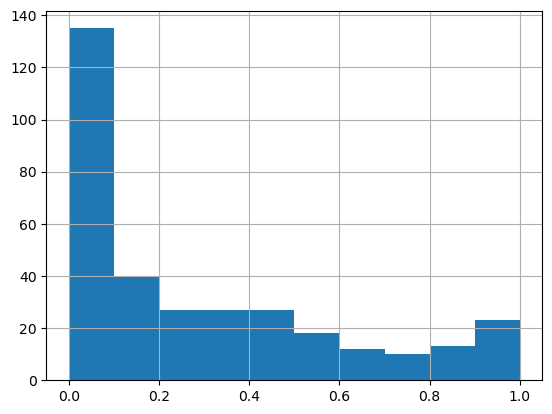

In [40]:
# Create the evaluation dataframe.
evaluation_df = pd.DataFrame({'Has Heart Disease': y_test, 'Model Prediction': predictions_list})
positive_df = evaluation_df[evaluation_df['Has Heart Disease'] == 1]

# A histogram of the model's predictions for people with heart disease.
positive_df['Model Prediction'].hist()

<Axes: >

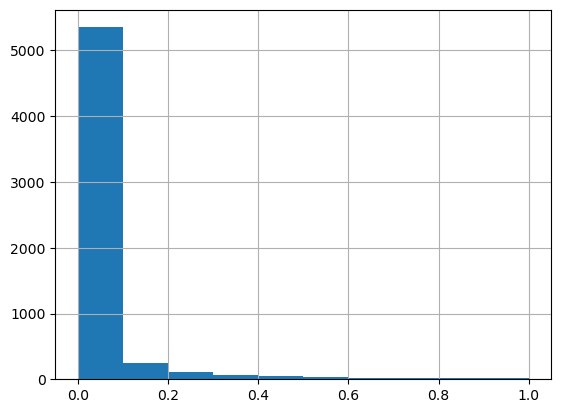

In [41]:
# Histogram of the model's predictions for people without heart disease.
negative_df = evaluation_df[evaluation_df['Has Heart Disease'] == 0]
negative_df['Model Prediction'].hist()

# NN Model #4
- 25,000 data points
- 2 hidden layers
- Uses resampled data

In [42]:
# Create neural network structure.
nn = tf.keras.models.Sequential()

num_inputs = len(X_train[0])

# Input layer.
nn.add(tf.keras.layers.Dense(units=16, activation='relu', input_dim=num_inputs))

# First hidden layer
nn.add(tf.keras.layers.Dense(units=32, activation="relu"))

# Second hidden layer.
nn.add(tf.keras.layers.Dense(units=32, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_res, y_res, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
1110/1110 [==============================] - 2s 1ms/step - loss: 0.4573 - accuracy: 0.7819
Epoch 2/50
1110/1110 [==============================] - 1s 1ms/step - loss: 0.4060 - accuracy: 0.8144
Epoch 3/50
1110/1110 [==============================] - 1s 1ms/step - loss: 0.3859 - accuracy: 0.8247
Epoch 4/50
1110/1110 [==============================] - 1s 1ms/step - loss: 0.3658 - accuracy: 0.8373
Epoch 5/50
1110/1110 [==============================] - 1s 1ms/step - loss: 0.3443 - accuracy: 0.8484
Epoch 6/50
1110/1110 [==============================] - 1s 1ms/step - loss: 0.3260 - accuracy: 0.8553
Epoch 7/50
1110/1110 [==============================] - 1s 1ms/step - loss: 0.3086 - accuracy: 0.8667
Epoch 8/50
1110/1110 [==============================] - 1s 1ms/step - loss: 0.2941 - accuracy: 0.8789
Epoch 9/50
1110/1110 [==============================] - 1s 1ms/step - loss: 0.2822 - accuracy: 0.8847
Epoch 10/50
1110/1110 [==============================] - 1s 1ms/step - loss: 0.269

196/196 [==============================] - 0s 2ms/step


<Axes: >

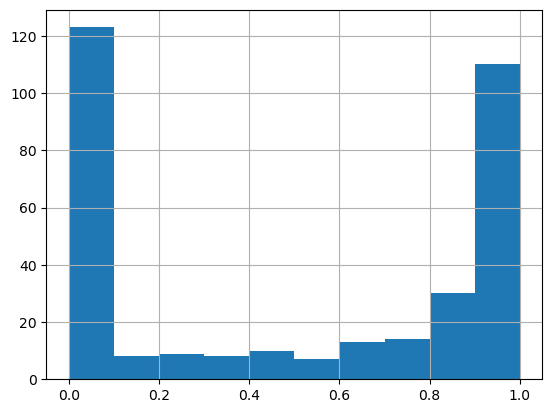

In [43]:
# Make predictions.
predictions = nn.predict(X_test)
predictions_list = predictions.flatten().tolist()
# plt.hist(predictions_list)

# Create a dataframe with actual heart disease labels along with the model's predictions.
evaluation_df = pd.DataFrame({'Has Heart Disease': y_test, 'Model Prediction': predictions_list})
positive_df = evaluation_df[evaluation_df['Has Heart Disease'] == 1]
positive_df['Model Prediction'].hist()

<Axes: >

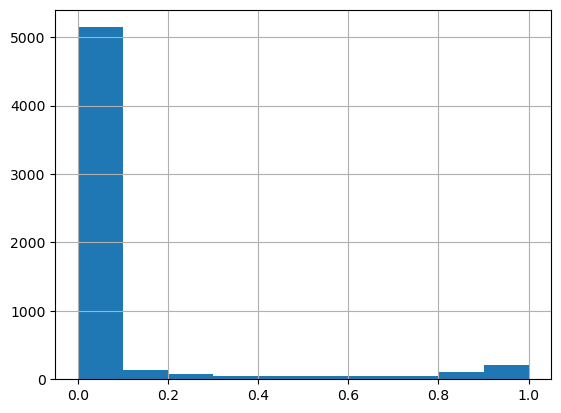

In [44]:
# Histogram of the model's predictions for people without heart disease.
negative_df = evaluation_df[evaluation_df['Has Heart Disease'] == 0]
negative_df['Model Prediction'].hist()

# Using 100,000 data values.

In [48]:
# Import the processed data.
df = pd.read_csv('processed_data_100k.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,Sex_Male,LastCheckupTime_Within past 2 years (1 year but less than 2 years ago),LastCheckupTime_Within past 5 years (2 years but less than 5 years ago),LastCheckupTime_Within past year (anytime less than 12 months ago),PhysicalActivities_Yes,...,AgeCategory_Age 40 to 44,AgeCategory_Age 45 to 49,AgeCategory_Age 50 to 54,AgeCategory_Age 55 to 59,AgeCategory_Age 60 to 64,AgeCategory_Age 65 to 69,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,AlcoholDrinkers_Yes
0,-0.488652,0.103781,-0.014655,-0.054821,1.397738,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,-0.488652,-0.515270,0.683217,1.634413,0.757997,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,-0.488652,-0.515270,-0.712528,-0.524053,0.118256,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,-0.488652,-0.515270,0.683217,0.883642,-0.094678,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,-0.488652,-0.515270,-0.014655,0.695949,1.184334,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [49]:
# Assign HadHeartAttack_Yes as target variable.
y = df.HadHeartAttack_Yes.values
X = df.drop(columns="HadHeartAttack_Yes").values

# Split training/test datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [50]:
# Instantiate the random oversampler model
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_res, y_res = ros.fit_resample(X_train, y_train)

# NN Model #5
- 100,000 data points
- 2 hidden layers
- 100 epochs
- Non resampled data

In [12]:
# Create neural network structure.
nn = tf.keras.models.Sequential()

num_inputs = len(X_train[0])

# Input layer.
nn.add(tf.keras.layers.Dense(units=16, activation='relu', input_dim=num_inputs))

# First hidden layer
nn.add(tf.keras.layers.Dense(units=32, activation="relu"))

# Second hidden layer.
nn.add(tf.keras.layers.Dense(units=32, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
2344/2344 [==============================] - 5s 1ms/step - loss: 0.1647 - accuracy: 0.9465
Epoch 2/100
2344/2344 [==============================] - 4s 2ms/step - loss: 0.1490 - accuracy: 0.9486
Epoch 3/100
2344/2344 [==============================] - 4s 2ms/step - loss: 0.1478 - accuracy: 0.9482
Epoch 4/100
2344/2344 [==============================] - 5s 2ms/step - loss: 0.1471 - accuracy: 0.9487
Epoch 5/100
2344/2344 [==============================] - 4s 2ms/step - loss: 0.1465 - accuracy: 0.9489
Epoch 6/100
2344/2344 [==============================] - 4s 2ms/step - loss: 0.1462 - accuracy: 0.9493
Epoch 7/100
2344/2344 [==============================] - 4s 2ms/step - loss: 0.1457 - accuracy: 0.9491
Epoch 8/100
2344/2344 [==============================] - 5s 2ms/step - loss: 0.1451 - accuracy: 0.9493
Epoch 9/100
2344/2344 [==============================] - 6s 2ms/step - loss: 0.1450 - accuracy: 0.9492
Epoch 10/100
2344/2344 [==============================] - 5s 2ms/step - l

In [14]:
# Make predictions.
predictions = nn.predict(X_test)
predictions_list = predictions.flatten().tolist()

# Create the evaluation dataframe.
evaluation_df = pd.DataFrame({'Has Heart Disease': y_test, 'Model Prediction': predictions_list})
positive_df = evaluation_df[evaluation_df['Has Heart Disease'] == 1]
positive_df.head(20)

782/782 [==============================] - 1s 1ms/step


,Has Heart Disease,Model Prediction
10,1,0.446037
24,1,0.364393
27,1,0.430772
52,1,0.239792
99,1,0.675030
132,1,0.041439
153,1,0.093917
157,1,0.369567
188,1,0.694323
190,1,0.005336


<Axes: >

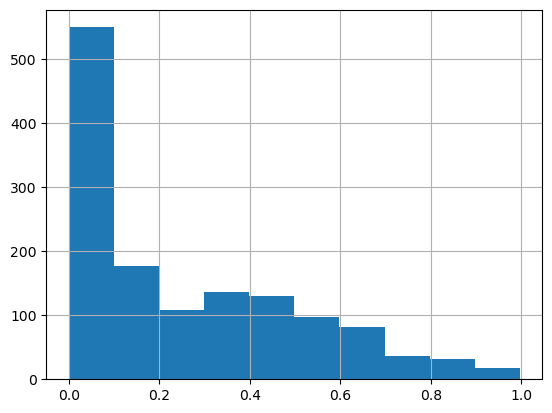

In [15]:
positive_df['Model Prediction'].hist()

<Axes: >

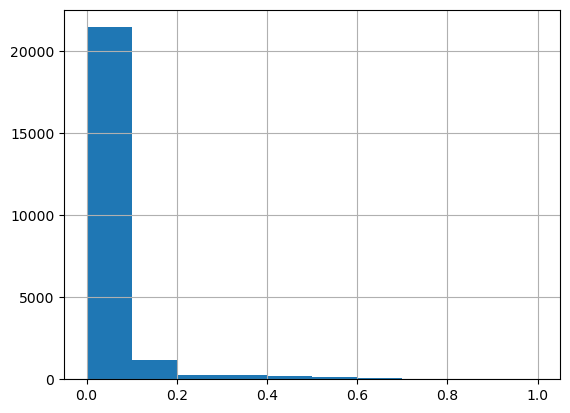

In [16]:
negative_df = evaluation_df[evaluation_df['Has Heart Disease'] == 0]
negative_df['Model Prediction'].hist()

# NN Model #6
- 100,000 data points
- 2 hidden layers
- 100 epochs
- Uses resampled data

In [51]:
# Create neural network structure.
nn = tf.keras.models.Sequential()

num_inputs = len(X_train[0])

# Input layer.
nn.add(tf.keras.layers.Dense(units=16, activation='relu', input_dim=num_inputs))

# First hidden layer
nn.add(tf.keras.layers.Dense(units=32, activation="relu"))

# Second hidden layer.
nn.add(tf.keras.layers.Dense(units=32, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_res, y_res, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
4431/4431 [==============================] - 6s 1ms/step - loss: 0.4400 - accuracy: 0.7912
Epoch 2/100
4431/4431 [==============================] - 5s 1ms/step - loss: 0.4183 - accuracy: 0.8029
Epoch 3/100
4431/4431 [==============================] - 5s 1ms/step - loss: 0.4089 - accuracy: 0.8077
Epoch 4/100
4431/4431 [==============================] - 5s 1ms/step - loss: 0.4014 - accuracy: 0.8125
Epoch 5/100
4431/4431 [==============================] - 6s 1ms/step - loss: 0.3939 - accuracy: 0.8165
Epoch 6/100
4431/4431 [==============================] - 8s 2ms/step - loss: 0.3866 - accuracy: 0.8206
Epoch 7/100
4431/4431 [==============================] - 8s 2ms/step - loss: 0.3799 - accuracy: 0.8243
Epoch 8/100
4431/4431 [==============================] - 8s 2ms/step - loss: 0.3732 - accuracy: 0.8285
Epoch 9/100
4431/4431 [==============================] - 8s 2ms/step - loss: 0.3673 - accuracy: 0.8329
Epoch 10/100
4431/4431 [==============================] - 15s 3ms/step - 

782/782 [==============================] - 1s 834us/step


<Axes: >

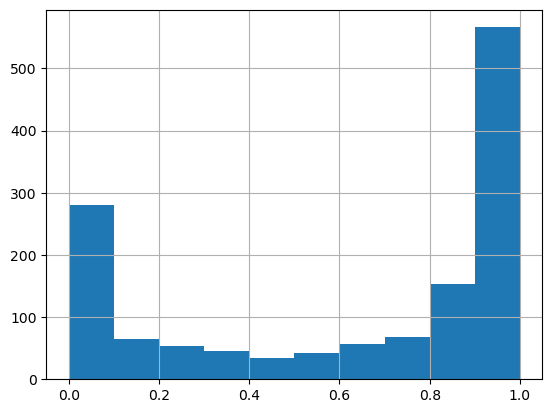

In [52]:
# Make predictions.
predictions = nn.predict(X_test)
predictions_list = predictions.flatten().tolist()

# Create the evaluation dataframe.
evaluation_df = pd.DataFrame({'Has Heart Disease': y_test, 'Model Prediction': predictions_list})
positive_df = evaluation_df[evaluation_df['Has Heart Disease'] == 1]
positive_df['Model Prediction'].hist()

<Axes: >

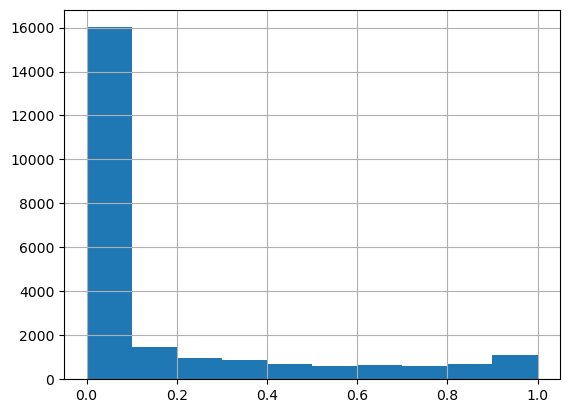

In [53]:
# Histogram of the model's predictions for people without heart disease.
negative_df = evaluation_df[evaluation_df['Has Heart Disease'] == 0]
negative_df['Model Prediction'].hist()

# NN Model #7
- 100,000 data points
- 4 hidden layers
- 300 epochs
- Non resampled data

In [3]:
# Assign HadHeartAttack_Yes as target variable.
y = df.HadHeartAttack_Yes.values
X = df.drop(columns="HadHeartAttack_Yes").values

# Split training/test datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Create neural network structure.
nn = tf.keras.models.Sequential()

num_inputs = len(X_train[0])

# Input layer.
nn.add(tf.keras.layers.Dense(units=16, activation='relu', input_dim=num_inputs))

# First hidden layer
nn.add(tf.keras.layers.Dense(units=32, activation="relu"))

# Second hidden layer.
nn.add(tf.keras.layers.Dense(units=64, activation="relu"))

# Third hidden layer.
nn.add(tf.keras.layers.Dense(units=64, activation="relu"))

# Fourth hidden layer.
nn.add(tf.keras.layers.Dense(units=32, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train, y_train, epochs=300)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/300
2344/2344 [==============================] - 4s 1ms/step - loss: 0.1642 - accuracy: 0.9462
Epoch 2/300
2344/2344 [==============================] - 3s 1ms/step - loss: 0.1500 - accuracy: 0.9475
Epoch 3/300
2344/2344 [==============================] - 3s 1ms/step - loss: 0.1483 - accuracy: 0.9483
Epoch 4/300
2344/2344 [==============================] - 3s 1ms/step - loss: 0.1475 - accuracy: 0.9482
Epoch 5/300
2344/2344 [==============================] - 3s 1ms/step - loss: 0.1470 - accuracy: 0.9477
Epoch 6/300
2344/2344 [==============================] - 3s 1ms/step - loss: 0.1464 - accuracy: 0.9488
Epoch 7/300
2344/2344 [==============================] - 3s 1ms/step - loss: 0.1461 - accuracy: 0.9489
Epoch 8/300
2344/2344 [==============================] - 3s 1ms/step - loss: 0.1454 - accuracy: 0.9485
Epoch 9/300
2344/2344 [==============================] - 3s 1ms/step - loss: 0.1451 - accuracy: 0.9489
Epoch 10/300
2344/2344 [==============================] - 3s 1ms/step - l

782/782 [==============================] - 2s 2ms/step


<Axes: >

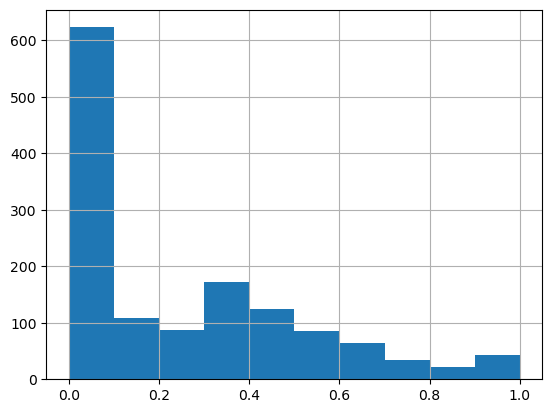

In [20]:
# Make predictions.
predictions = nn.predict(X_test)
predictions_list = predictions.flatten().tolist()

# Create the evaluation dataframe.
evaluation_df = pd.DataFrame({'Has Heart Disease': y_test, 'Model Prediction': predictions_list})
positive_df = evaluation_df[evaluation_df['Has Heart Disease'] == 1]
positive_df['Model Prediction'].hist()

# NN Model #8
- 100,000 data points
- 4 hidden layers
- 300 epochs
- Uses resampled data

In [54]:
# Assign HadHeartAttack_Yes as target variable.
y = df.HadHeartAttack_Yes.values
X = df.drop(columns="HadHeartAttack_Yes").values

# Split training/test datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Create neural network structure.
nn = tf.keras.models.Sequential()

num_inputs = len(X_train[0])

# Input layer.
nn.add(tf.keras.layers.Dense(units=16, activation='relu', input_dim=num_inputs))

# First hidden layer
nn.add(tf.keras.layers.Dense(units=32, activation="relu"))

# Second hidden layer.
nn.add(tf.keras.layers.Dense(units=64, activation="relu"))

# Third hidden layer.
nn.add(tf.keras.layers.Dense(units=64, activation="relu"))

# Fourth hidden layer.
nn.add(tf.keras.layers.Dense(units=32, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_res, y_res, epochs=300)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/300
4431/4431 [==============================] - 6s 1ms/step - loss: 0.4403 - accuracy: 0.7913
Epoch 2/300
4431/4431 [==============================] - 5s 1ms/step - loss: 0.4116 - accuracy: 0.8067
Epoch 3/300
4431/4431 [==============================] - 5s 1ms/step - loss: 0.3846 - accuracy: 0.8231
Epoch 4/300
4431/4431 [==============================] - 5s 1ms/step - loss: 0.3564 - accuracy: 0.8376
Epoch 5/300
4431/4431 [==============================] - 5s 1ms/step - loss: 0.3313 - accuracy: 0.8516
Epoch 6/300
4431/4431 [==============================] - 5s 1ms/step - loss: 0.3107 - accuracy: 0.8638
Epoch 7/300
4431/4431 [==============================] - 7s 1ms/step - loss: 0.2937 - accuracy: 0.8724
Epoch 8/300
4431/4431 [==============================] - 6s 1ms/step - loss: 0.2798 - accuracy: 0.8805
Epoch 9/300
4431/4431 [==============================] - 7s 2ms/step - loss: 0.2671 - accuracy: 0.8890
Epoch 10/300
4431/4431 [==============================] - 6s 1ms/step - l

782/782 [==============================] - 1s 1ms/step


<Axes: >

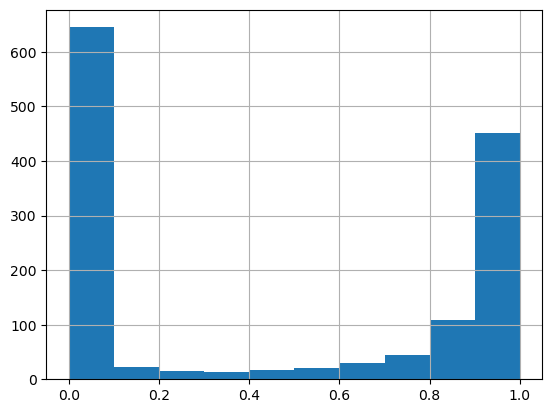

In [55]:
# Make predictions.
predictions = nn.predict(X_test)
predictions_list = predictions.flatten().tolist()

# Create the evaluation dataframe.
evaluation_df = pd.DataFrame({'Has Heart Disease': y_test, 'Model Prediction': predictions_list})
positive_df = evaluation_df[evaluation_df['Has Heart Disease'] == 1]
positive_df['Model Prediction'].hist()

<Axes: >

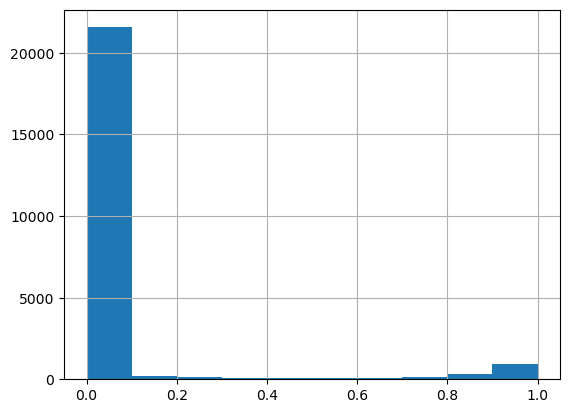

In [56]:
# Histogram of the model's predictions for people without heart disease.
negative_df = evaluation_df[evaluation_df['Has Heart Disease'] == 0]
negative_df['Model Prediction'].hist()